<a href="https://colab.research.google.com/github/hjhan1201/AIFFEL_Online_Quest/blob/main/DeepLearning_OneQ3_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

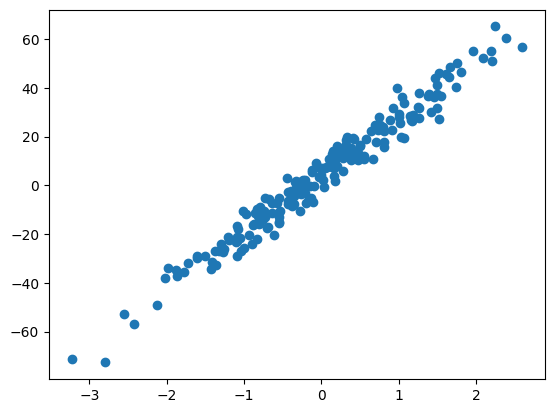

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=1,
                       bias=5.0, noise=5.0, random_state=123)
y = np.expand_dims(y, axis=1)

plt.scatter(X, y)
plt.show()

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=123)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(160, 1) (160, 1)
(40, 1) (40, 1)


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, utils

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


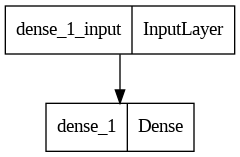

In [6]:
model = keras.Sequential()
model.add(layers.Dense(1, activation='linear', input_shape=(1,)))
model.summary()
utils.plot_model(model)

In [7]:
optimizer = optimizers.SGD()
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
history = model.fit(x_train, y_train, epochs=40)

Epoch 1/40
5/5 [==============================] - 1s 7ms/step - loss: 622.8146 - mae: 19.9709 - mse: 622.8146
Epoch 2/40
5/5 [==============================] - 0s 4ms/step - loss: 500.1020 - mae: 17.9013 - mse: 500.1020
Epoch 3/40
5/5 [==============================] - 0s 4ms/step - loss: 402.3936 - mae: 16.1523 - mse: 402.3936
Epoch 4/40
5/5 [==============================] - 0s 4ms/step - loss: 324.6725 - mae: 14.4704 - mse: 324.6725
Epoch 5/40
5/5 [==============================] - 0s 4ms/step - loss: 262.8178 - mae: 13.0540 - mse: 262.8178
Epoch 6/40
5/5 [==============================] - 0s 3ms/step - loss: 213.7141 - mae: 11.7223 - mse: 213.7141
Epoch 7/40
5/5 [==============================] - 0s 4ms/step - loss: 174.3054 - mae: 10.5690 - mse: 174.3054
Epoch 8/40
5/5 [==============================] - 0s 4ms/step - loss: 143.1100 - mae: 9.5891 - mse: 143.1100
Epoch 9/40
5/5 [==============================] - 0s 4ms/step - loss: 118.2696 - mae: 8.7325 - mse: 118.2696
Epoch 10/40


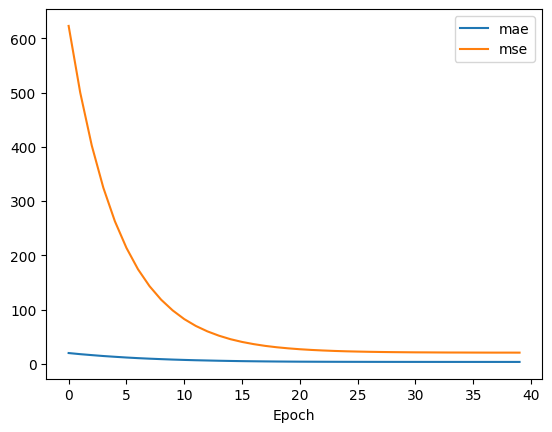

In [8]:
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.xlabel('Epoch')
plt.legend(['mae', 'mse'])
plt.show();

In [9]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 19ms/step - loss: 21.9299 - mae: 3.9887 - mse: 21.9299


[21.929903030395508, 3.988684892654419, 21.929903030395508]

7/7 [==============================] - 0s 8ms/step


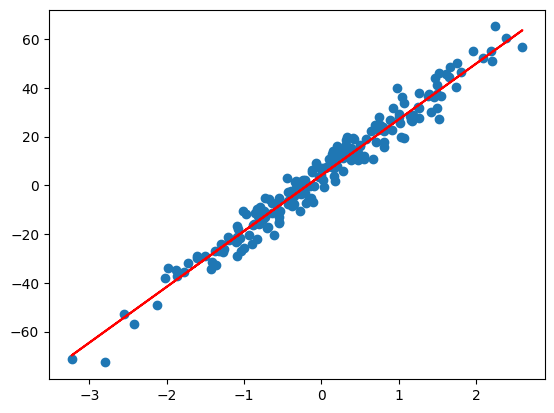

In [10]:
result = model.predict(X)

plt.scatter(X, y)
plt.plot(X, result, 'r')
plt.show()

In [14]:
model.layers

In [18]:
layer = model.layers[0]
print(layer.name)
layer = model.get_layer('dense_1')
print(layer.name)

dense_1
dense_1


In [12]:
weights, biases = layer.get_weights()
print(weights)
print(biases)

[[22.896503]]
[4.1798525]


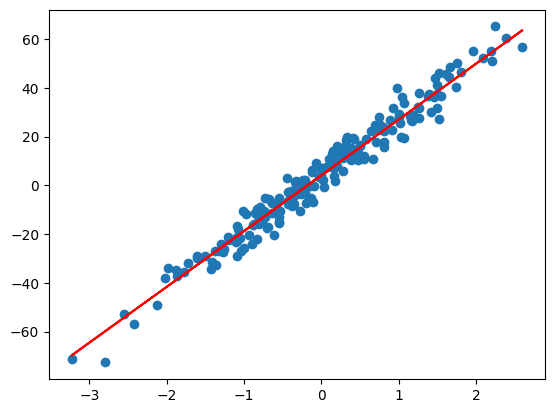

In [19]:
plt.scatter(X, y)
plt.plot(X, np.array(weights * X + biases), 'r')
plt.show()